<a href="https://colab.research.google.com/github/amanullahshah32/Machine-Learning/blob/main/Decision_Trees_and_Random_Forests_Practice/RainTomorrow_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
raw_df  = pd.read_csv('/content/drive/MyDrive/Datasets/weatherAUS.csv')

In [4]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# drop the rows containing nan/ na/ null values

raw_df.dropna(subset=['RainTomorrow'], inplace= True)

# Exploratory Data Analysis

In [7]:
import plotly.express as px


In [8]:
px.histogram(raw_df, x='Location', title= 'Location vs Rainy Days', color = 'RainTomorrow')
#plt.show()

In [9]:
px.histogram(raw_df, x= 'MinTemp', color = 'RainTomorrow', title = 'Mintem vs Rain tomorrow')

In [10]:
px.histogram(raw_df, x='RainToday', color= 'RainTomorrow', title= 'Rain today vs Rain tomorrow')

In [11]:
px.histogram(raw_df, x='MinTemp', y='MaxTemp', color= 'RainTomorrow', title= 'Mintemp vs Maxtemp relation')

In [12]:
px.scatter(raw_df, title= 'Min temp vs Max Temp', x='MinTemp', y='MaxTemp', color='RainToday')

In [13]:
px.scatter(raw_df, title= 'Min temp vs Max Temp', x='MinTemp', y='MaxTemp', color='RainTomorrow')

In [14]:
px.scatter(raw_df.sample(2000), title='Temp (3pm) vs. Humidity (3pm)', x='Temp3pm', y='Humidity3pm', color='RainTomorrow' )

# Preparing the Data for Training

### Training, Validation, and Test Sets

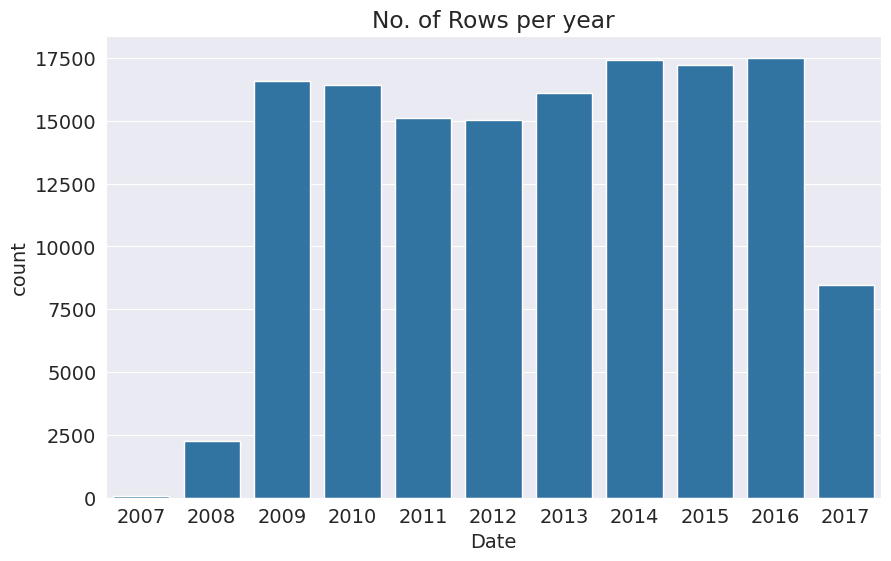

In [15]:
plt.title('No. of Rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year);

In [16]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [17]:
print('train_df.shape :', train_df.shape)
print('val_df.shape : ', val_df.shape)
print('test_df.shape :  ', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape :  (17231, 23)
test_df.shape :   (25974, 23)


## Input and Target Columns

In [18]:
input_cols  = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [19]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [20]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [21]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [22]:
#identify the numeric and categorical columns
numeric_cols= train_inputs.select_dtypes(include= np.number).columns.tolist()
categorical_cols= train_inputs.select_dtypes('object').columns.tolist()

In [27]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [28]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Imputing missing numeric values

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [35]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [37]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [40]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [45]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

## Encoding Categorical Data

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder = OneHotEncoder(sparse = False, handle_unknown= 'ignore').fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [51]:
encoded_cols =  list(encoder.get_feature_names_out(categorical_cols))

In [52]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-52-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-8950d7c1751d>:1: PerformanceWarning:

Da

In [53]:
test_inputs


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [54]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [55]:
X_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037723  0.525852       0.294574   
1       0.375000  0.565217  0.000000     0.037723  0.525852       0.294574   
2       0.504717  0.576560  0.000000     0.037723  0.525852       0.310078   
3       0.417453  0.620038  0.000000     0.037723  0.525852       0.139535   
4       0.613208  0.701323  0.002695     0.037723  0.525852       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037723  0.525852       0.286822   
144549  0.556604  0.786389  0.000000     0.037723  0.525852       0.193798   
144550  0.608491  0.805293  0.000000     0.037723  0.525852       0.255814   
144551  0.674528  0.818526  0.000000     0.037723  0.525852       0.286822   
144552  0.731132  0.839319  0.000000     0.037723  0.525852       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0            0.4800  0.888889  0.500352  0.508439  0.522073   
1            0.4912  0.493021  0.500352  0.514768  0.570058   
2            0.5056  0.493021  0.222222  0.594937  0.548944   
3            0.5712  0.493021  0.500352  0.533755  0.612284   
4            0.4624  0.777778  0.888889  0.527426  0.673704   
...             ...       ...       ...       ...       ...   
144548       0.5232  0.493021  0.500352  0.651899  0.714012   
144549       0.4880  0.493021  0.500352  0.761603  0.771593   
144550       0.4944  0.493021  0.500352  0.778481  0.788868   
144551       0.5136  0.493021  0.500352  0.780591  0.817658   
144552       0.4656  0.493021  0.500352  0.786920  0.821497   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                   

In [57]:
#raw_df

# Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### **Training**

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.



In [62]:
from sklearn.tree import DecisionTreeClassifier


In [63]:
model = DecisionTreeClassifier(random_state= 42)

In [64]:
%%time
model.fit(X_train, train_targets)

CPU times: user 4.21 s, sys: 32.9 ms, total: 4.24 s
Wall time: 6.36 s


DecisionTreeClassifier(random_state=42)

### **Evaluation**

Let's evaluate the decision tree using the accuracy score.



In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
train_preds = model.predict(X_train)

In [68]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)